✅ Model and tokenizer loaded successfully

✅ Validation Accuracy: 71.43%

📊 Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.89      0.80       148
  suspicious       0.76      0.51      0.61       117
    critical       0.65      0.70      0.68       113

    accuracy                           0.71       378
   macro avg       0.72      0.70      0.70       378
weighted avg       0.72      0.71      0.71       378



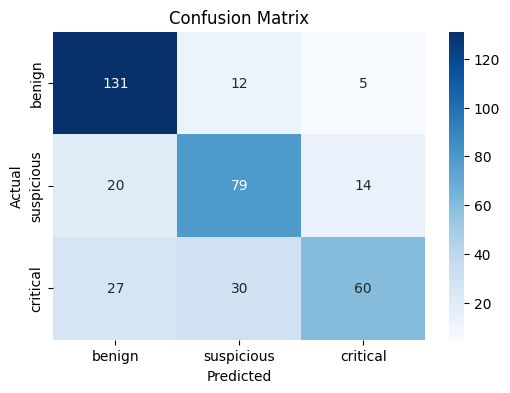

In [6]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
MODEL_PATH = "sentiments.h5"
TOKENIZER_PATH = "tokenizer.pkl"
VAL_PATH = "validation.csv"

# Globals
MAX_SEQ_LEN = 18  # adjust to your training
LABELS = ["benign", "suspicious", "critical"]  # must match training order

# Load tokenizer
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

# Load model
model = tf.keras.models.load_model(MODEL_PATH)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print("✅ Model and tokenizer loaded successfully")

# Load validation data
df = pd.read_csv(VAL_PATH)

texts = df["text"].astype(str).tolist()
true_labels = df["label"].astype(str).tolist()

# Convert text to sequences
seqs = tokenizer.texts_to_sequences(texts)
padded = tf.keras.preprocessing.sequence.pad_sequences(
    seqs, maxlen=MAX_SEQ_LEN, padding="post", truncating="post"
)

# Predict
preds = model.predict(padded, verbose=0)
pred_idxs = np.argmax(preds, axis=1)
pred_labels = [LABELS[i] for i in pred_idxs]

# Accuracy
acc = accuracy_score(true_labels, pred_labels)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# Detailed metrics
print("\n📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=LABELS))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=LABELS)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
